In [21]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr


In [24]:
yf.pdr_override()

start = '2010-01-01'
end = '2024-02-10'

df = pdr.get_data_yahoo('HDB', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,13.275,13.348,13.163,13.346,12.164502,2117000
2010-01-05,13.277,13.403,13.250,13.403,12.216455,1906000
2010-01-06,13.250,13.510,13.250,13.463,12.271144,1293000
2010-01-07,13.357,13.689,13.350,13.678,12.467112,2944000
2010-01-08,13.402,13.750,13.402,13.719,12.504482,1712000


In [25]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,13.275,13.348,13.163,13.346,12.164502,2117000
2010-01-05,13.277,13.403,13.250,13.403,12.216455,1906000
2010-01-06,13.250,13.510,13.250,13.463,12.271144,1293000
2010-01-07,13.357,13.689,13.350,13.678,12.467112,2944000
2010-01-08,13.402,13.750,13.402,13.719,12.504482,1712000


In [26]:
df = df[['Open', 'High','Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,13.275,13.348,13.163,13.346,2117000
2010-01-05,13.277,13.403,13.250,13.403,1906000
2010-01-06,13.250,13.510,13.250,13.463,1293000
2010-01-07,13.357,13.689,13.350,13.678,2944000
2010-01-08,13.402,13.750,13.402,13.719,1712000


Text(0, 0.5, 'Price(in USD)')

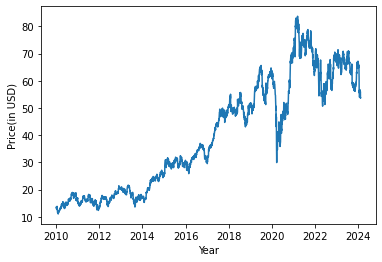

In [27]:
plt.plot(df.Close)
plt.xlabel('Year')
plt.ylabel('Price(in USD)')

In [28]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,13.275000,13.348000,13.163000,13.346000,2117000
2010-01-05,13.277000,13.403000,13.250000,13.403000,1906000
2010-01-06,13.250000,13.510000,13.250000,13.463000,1293000
2010-01-07,13.357000,13.689000,13.350000,13.678000,2944000
2010-01-08,13.402000,13.750000,13.402000,13.719000,1712000
...,...,...,...,...,...
2024-02-05,54.000000,55.759998,54.000000,55.470001,4601000
2024-02-06,55.450001,56.119999,55.349998,56.049999,3319400
2024-02-07,55.619999,55.869999,55.040001,55.630001,2304600


In [29]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-01-04        NaN
2010-01-05        NaN
2010-01-06        NaN
2010-01-07        NaN
2010-01-08        NaN
               ...   
2024-02-05    60.2647
2024-02-06    60.1700
2024-02-07    60.0643
2024-02-08    59.9503
2024-02-09    59.8538
Name: Close, Length: 3550, dtype: float64

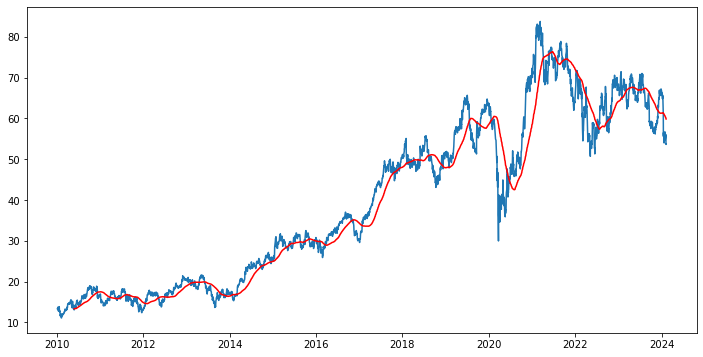

In [30]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [31]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-02-05    63.46740
2024-02-06    63.39845
2024-02-07    63.32215
2024-02-08    63.23765
2024-02-09    63.15855
Name: Close, Length: 3550, dtype: float64

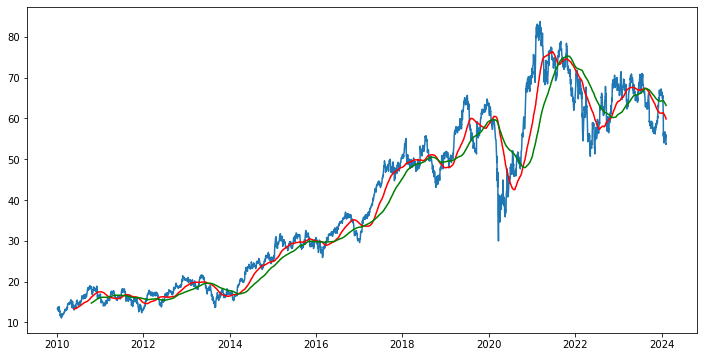

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [33]:
df.shape

(3550, 5)

In [34]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2485, 1)
(1065, 1)


In [35]:
data_training.head()

,Close
Date,
2010-01-04,13.346
2010-01-05,13.403
2010-01-06,13.463
2010-01-07,13.678
2010-01-08,13.719


In [36]:
data_testing.head()

,Close
Date,
2019-11-15,61.959999
2019-11-18,61.389999
2019-11-19,61.419998
2019-11-20,61.770000
2019-11-21,61.689999


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04146814],
       [0.04251264],
       [0.04361211],
       ...,
       [0.92514478],
       [0.92386207],
       [0.93467348]])

In [39]:
data_training_array.shape

(2485, 1)

In [40]:
x_train = []
y_train = []

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [41]:
from keras.layers import Dense ,  Dropout , LSTM
from keras.models import Sequential

In [42]:

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)


Epoch 1/50
75/75 [==============================] - 14s 84ms/step - loss: 0.0133
Epoch 2/50
75/75 [==============================] - 6s 82ms/step - loss: 0.0060
Epoch 3/50
75/75 [==============================] - 6s 82ms/step - loss: 0.0051
Epoch 4/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0051
Epoch 5/50
75/75 [==============================] - 6s 82ms/step - loss: 0.0036
Epoch 6/50
75/75 [==============================] - 6s 84ms/step - loss: 0.0032
Epoch 7/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0030
Epoch 8/50
75/75 [==============================] - 6s 82ms/step - loss: 0.0031
Epoch 9/50
75/75 [==============================] - 6s 82ms/step - loss: 0.0027
Epoch 10/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0025
Epoch 11/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0026
Epoch 12/50
75/75 [==============================] - 6s 84ms/step - loss: 0.0025
Epoch 13/50
75/75 [=================

In [43]:
regressor.save('stock_model.h5')

In [44]:
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [45]:
data_testing.head()

,Close
Date,
2019-11-15,61.959999
2019-11-18,61.389999
2019-11-19,61.419998
2019-11-20,61.770000
2019-11-21,61.689999


In [46]:
data_training.tail(100)

,Close
Date,
2019-06-26,63.895000
2019-06-27,64.385002
2019-06-28,65.019997
2019-07-01,65.485001
2019-07-02,65.650002
...,...
2019-11-08,61.810001
2019-11-11,61.849998
2019-11-12,61.570000


In [47]:
past_100_days = data_training.tail(100)

In [48]:
final_df = pd.concat([past_100_days,data_testing])

In [49]:
final_df.head()

,Close
Date,
2019-06-26,63.895000
2019-06-27,64.385002
2019-06-28,65.019997
2019-07-01,65.485001
2019-07-02,65.650002


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.63087936],
       [0.63998889],
       [0.65179396],
       ...,
       [0.47722628],
       [0.4398587 ],
       [0.44227553]])

In [51]:
input_data.shape

(1165, 1)

In [52]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i , 0])


In [53]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1065, 100, 1)
(1065,)


In [54]:
y_predicted = regressor.predict(x_test)

34/34 [==============================] - 5s 46ms/step


In [55]:
y_predicted.shape

(1065, 1)

In [56]:
y_test

array([0.59490611, 0.58430935, 0.58486705, ..., 0.47722628, 0.4398587 ,
       0.44227553])

In [57]:
y_predicted

array([[0.5860008 ],
       [0.58636713],
       [0.58625376],
       ...,
       [0.44925112],
       [0.45125127],
       [0.4527103 ]], dtype=float32)

In [58]:
scaler.scale_

array([0.01859082])

In [59]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

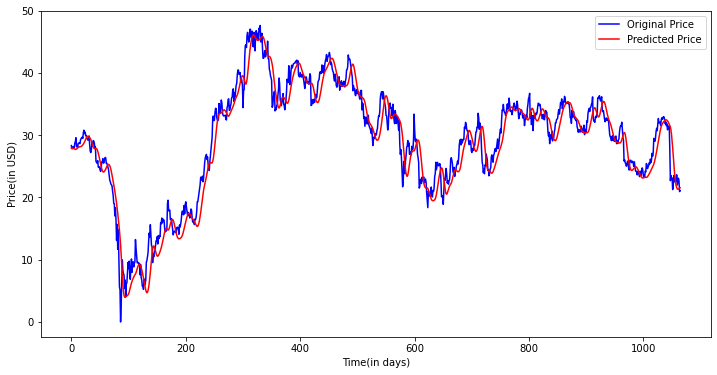

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' ,label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Time(in days)')
plt.ylabel('Price(in USD)')
plt.legend()
plt.show

In [61]:
return_rmse(data_testing,y_predicted)

The root mean squared error is 34.32233254263223.


In [64]:
microsoft = yf.Ticker('HDB')
dict =  microsoft.info
df = pd.DataFrame.from_dict(dict,orient='index')
df = df.reset_index()
df

,index,0
0,address1,HDFC Bank House
1,address2,Senapati Bapat Marg Lower Parel (W)
2,city,Mumbai
3,zip,400013
4,country,India
...,...,...
110,earningsGrowth,0.029
111,revenueGrowth,1.132
112,operatingMargins,0.26553
113,financialCurrency,INR
